<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="healthinsurance.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Insurance Claim Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs

## Data Definition

**age** : Age of the policyholder (Numeric)

**sex:** Gender of policyholder (Categoric)

**weight:** Weight of the policyholder (Numeric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**no_of_dependents:** Number of dependent persons on the policyholder (Numeric)

**smoker:** Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

**claim:** The amount claimed by the policyholder (Numeric)

**bloodpressure:** Bloodpressure reading of policyholder (Numeric)

**diabetes:** Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

**regular_ex:** A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)

**job_title:** Job profile of the policyholder (Categoric)

**city:** The city in which the policyholder resides (Categoric)

**hereditary_diseases:**  A policyholder suffering from a hereditary diseases or not (Categoric)



 **[Data Analysis and Preparation](#data_preparation)**
    -  [Understand the Data](#Data_Understanding)
        -  [Data Dimension](#Data_Shape)
        -  [Data Types](#Data_Types)
        -  [Summary Statistics](#Summary_Statistics)
        -  [Missing Values](#Missing_Values)
        -  [Correlation](#correlation)
        -  [Analyze Categorical Variables](#categorical)
        -  [Analyze Relationships Between Target and Categorical Variables](#categorical_numerical)
        -  [Feature Engineering](#Feature_Engineering)
        -  [Discover Outliers](#outliers)
        -  [Recheck the Correlation](#Recheck_Correlation)
    -  - [Prepare the Data](#Data_Preparation)
        -  [Check for Normality](#Normality)
        -  [One-Way Anova](#one_way_anova)
        -  [Dummy Encoding of Categorical Variables](#dummy)
 **[Linear Regression (OLS)](#LinearRegression)**
    -  [Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)](#withLog)
    -  [Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)](#withoutLog)
    -  [Fine Tune Linear Regression Model (OLS)](#Finetuning)
      - [Linear Regression after Removing Insignificant Variable (OLS)](#RemovingInsignificantVariable)
      -  [Check the Assumptions of Linear Regression](#Assumptions)
          -  [Detecting Autocorrelation](#Autocorrelation)
          -  [Detecting Heteroskedasticity](#Heteroskedasticity)
          -  [Linearity of Residuals](#Linearity_of_Residuals)
          -  [Normality of Residuals](#Normality_of_Residuals)
      - [Linear Regression after Removing Insignificant Variable (OLS) - Scaled Data](#RemovingInsignificantVariable_scaleddata)
      -  [Linear Regression with Interaction (OLS)](#Interaction)
 **[Regularization (OLS)](#regularization)**
    -  [Ridge Regression Model (OLS)](#Ridge_Regression)
    -  [Lasso Regression Model (OLS)](#Lasso_Regression)
    -  [Elastic Net Regression Model (OLS)](#Elastic_Net)
 **[Stochastic Gradient Descent - SGD (sklearn)](#StochasticGradientDescent)**
    -  [Linear Regression with SGD (sklearn)](#LinearRegressionwithStochasticGradientDescent)
    -  [Linear Regression with SGD using GridSearchCV (sklearn)](#StochasticGradientDescentwithGridSearchCV)
 **[Conclusion and Interpretation](#rmse_and_r-squared)**    

In [298]:

import pandas as pd 

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [299]:

df = pd.read_csv("healthinsurance.csv")

df.head()



,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


<a id='data_preparation'></a>
##  Data Analysis and Preparation


In [300]:

df.shape

(15000, 13)

We see the dataframe has 13 columns and 15000 observations.

<a id='Data_Types'></a>
###  Data Types
Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.

In [301]:
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='infer.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                <font color='#21618C'>
                    <b>From the above output, we see that the data type of 'smoker', 'diabetes' and 'regular_ex' is 'int64'.<br><br>
                        But according to data definition, 'smoker', 'diabetes' and 'regular_ex' are categorical variables, which are wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>




In [302]:

df.smoker = df.smoker.astype('object')


df.diabetes = df.diabetes.astype('object')

df.regular_ex = df.regular_ex.astype('object')

In [303]:

df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                  object
city                    object
bloodpressure            int64
diabetes                object
regular_ex              object
job_title               object
claim                  float64
dtype: object

<a id='Summary_Statistics'></a>
### Summary Statistics

In [304]:
df.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,68.650133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,19.418515,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,71.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.<br>
    Note, the average age of a policyholder claiming the insurance is 39 years. The claim amount is between 1121 to 63770. Here the mean bmi of a policyholder is 30 (the healthy bmi range is between 18.5 to 24.9) and average weight is 64.<br><br>
    If we observe the count of all the variables, there is less count for variable age and bmi than other variables. So we can say that there are missing values in these variables. Also, the minimum bloodpressure is zero, which is invalid. We need to treat them appropriately.</b>     </font>
            </div>
        </td>
    </tr>
</table>

In [305]:

df.describe(include = object)

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,Nashville,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


<a id='Missing_Values'></a>
###  Missing Values

In [306]:
 df.isnull().sum()


age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

The missing values are present in the data for the `age` and `bmi` variables. There are 396 (2.6%) missing values for the variable `age` and 956 (6.4%) missing values for the variable `bmi`

### Visualize Missing Values using Heatmap

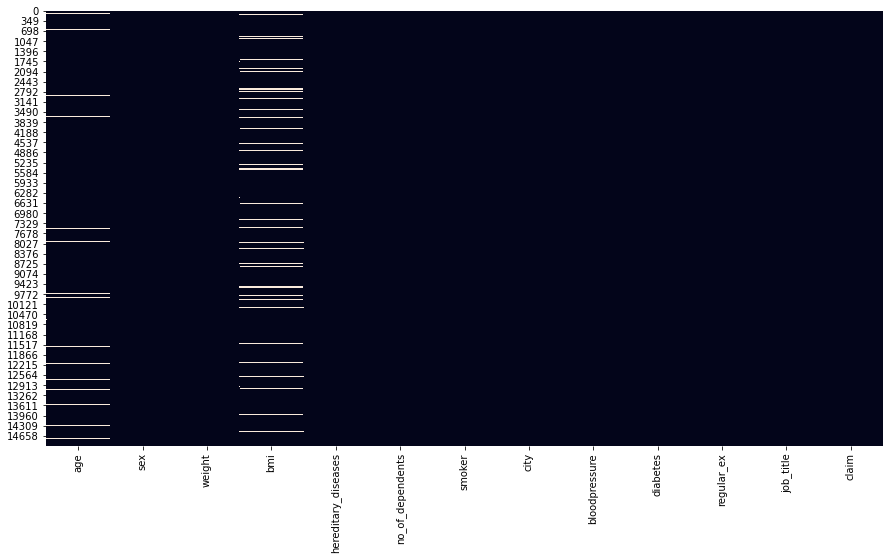

In [307]:

plt.figure(figsize=(15, 8))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

In [308]:
df['age'].groupby(df['sex']).mean()

sex
female    39.361040
male      39.738395
Name: age, dtype: float64

The average age for the male and female is nearly the same. We will fill in missing values with the mean age of the policyholder.

In [309]:
df['age'].fillna(df['age'].mean(), inplace=True)

Replace missing values by mean for the BMI.

In [310]:

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

Domain Point

We have seen that the the minimum bloodpressure is 0, which is absurd. It implies that these are missing values. 
Let us replace these missing values with the median value.

In [311]:
df['bloodpressure'] = df['bloodpressure'].replace(0,df['bloodpressure'].median()) 

In [312]:

df.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,72.228533,13401.437620
std,13.829705,13.701935,5.924606,1.228469,11.269793,12148.239619
min,18.000000,34.000000,16.000000,0.000000,40.000000,1121.900000
25%,27.000000,54.000000,25.900000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.800000,1.000000,71.000000,9545.650000
75%,51.000000,76.000000,34.100000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


To confirm the data is valid, observe the minimum and maximum value of the variable `bloodpressure` is 40, which can be possible with patients suffering from low bloodpressure.

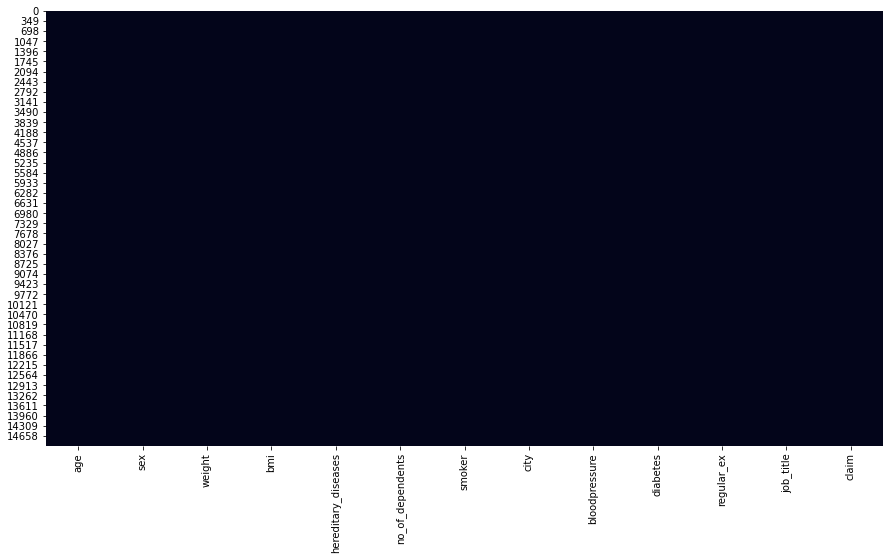

In [313]:

plt.figure(figsize=(15, 8))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

In [314]:
df_num = df.select_dtypes(include=np.number)


df_num.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

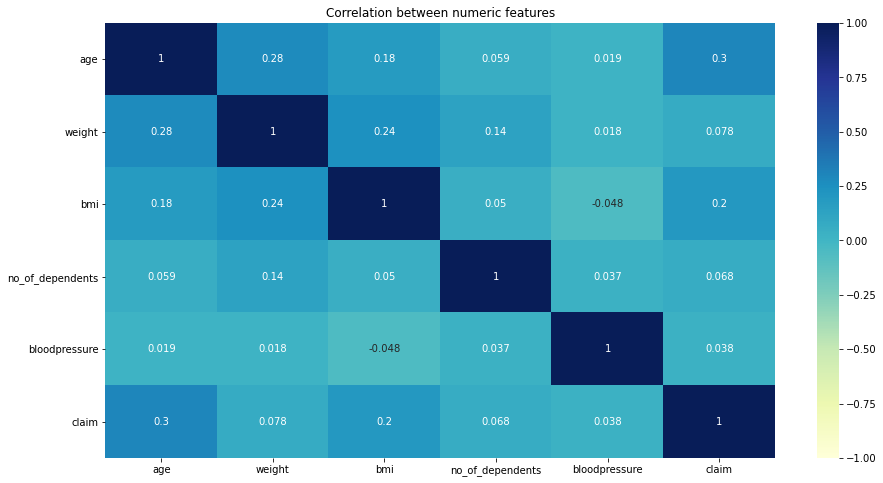

In [315]:
# set the figure size
plt.figure(figsize=(15, 8))


sns.heatmap(df_num.corr(), cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True )


plt.title('Correlation between numeric features')

# display the plot
plt.show()

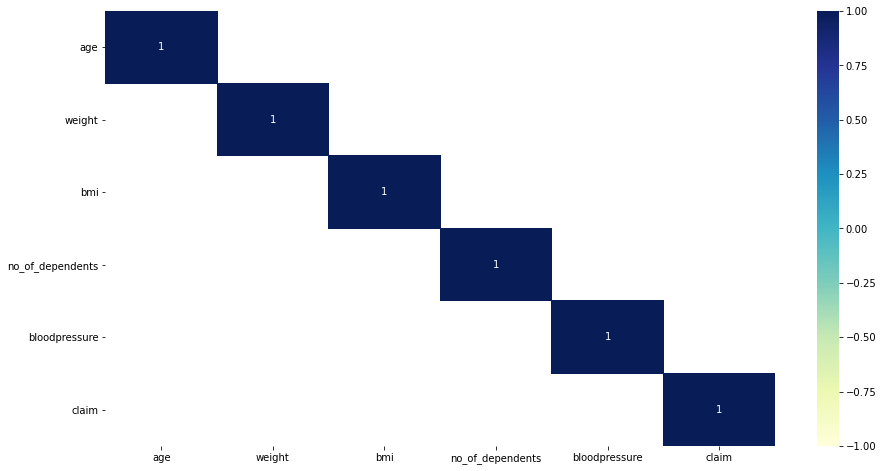

In [316]:
plt.figure(figsize=(15, 8))

sns.heatmap(df_num.corr()[np.abs(df.corr())>0.7], cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True )

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be observe that the numeric variables are not correlated with each other since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data. <br><br>
                        Recollect that one of the assumptions of linear regression is that, there should be NO Multicollinearity present in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Correlation does not imply causation. In other words, if two variables are correlated it does not mean that one variable caused the other</b> <br><br>
                </font>
            </div>
        </td>
    </tr>
</table>

In [317]:
# display the summary statistics of categorical variables
# include=objec: selects the categoric features
df.describe(include=object)

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,Nashville,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


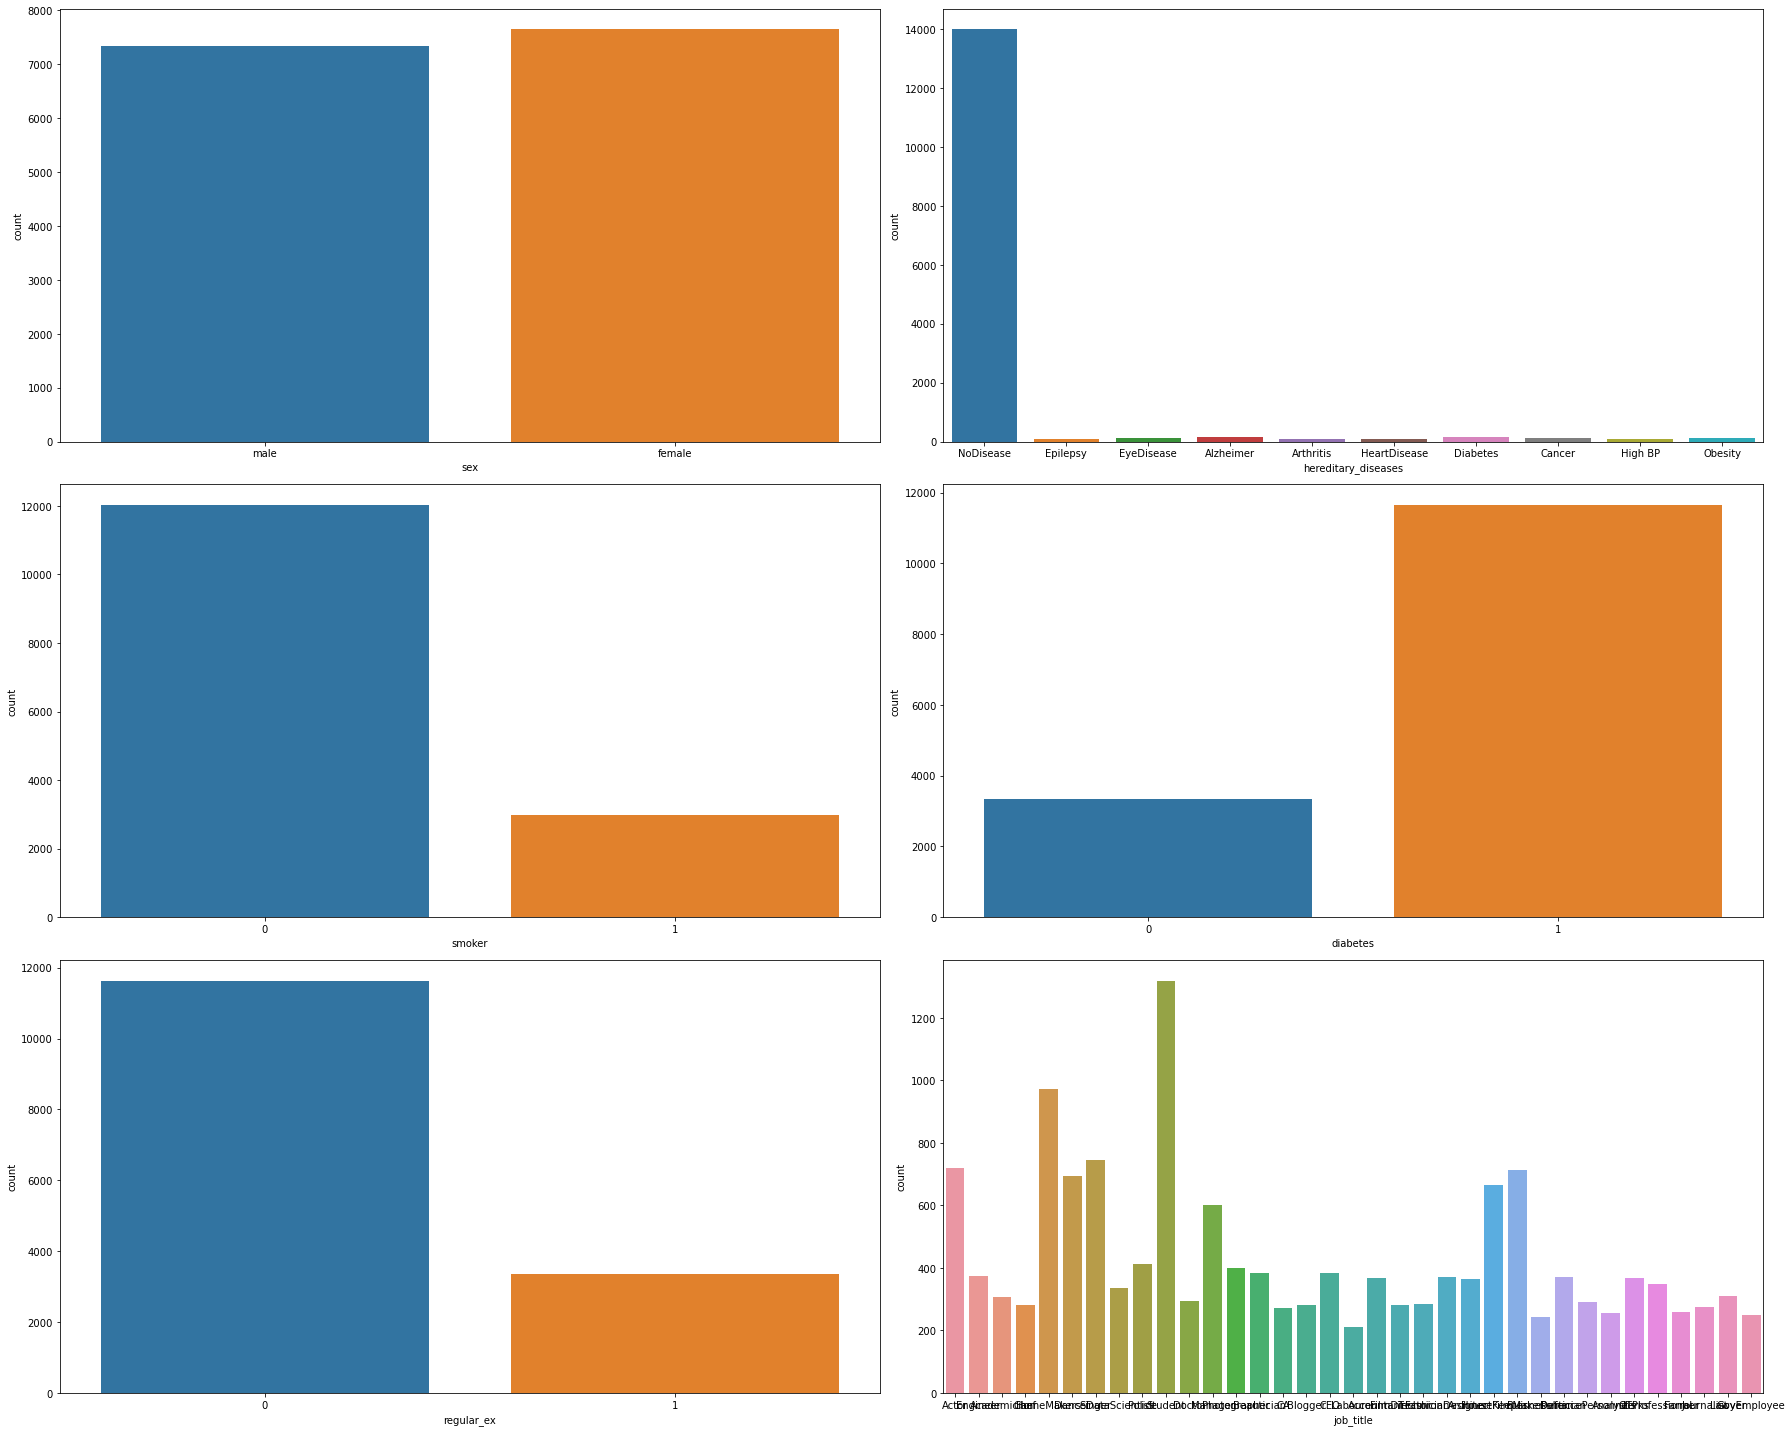

In [318]:

df_cat = df.select_dtypes(include='object').drop(['city'], axis=1)

fig, ax = plt.subplots(3, 2, figsize=(25, 20))


for variable, subplot in zip(df_cat, ax.flatten()):
    
    
    sns.countplot(df[variable], ax=subplot )
       
  
    plt.tight_layout()   

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot we see that:<ul>
                        <li> The number of males are femals are nearly equal</li>
                        <li> Most of the people in the data have no underlined disease </li>
                        <li> Also the number of non smokers is significantly large </li>
                        <li> Most of the policyholder do not excercise regularly</li>
                        <li> Many of the policyholders have diabetes</li>
                        <li> The had has large number of students</li>
                        </ul></b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                       We see that there are many cities considered in the data. It is quite difficult to perform meaningful analysis on this variable.
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='categorical_numerical'></a>
### Analyze Relationship Between Target and Categorical Variables
The box-and-whisker plot is commonly used for visualizing relationships between numerical variables and categorical variables.

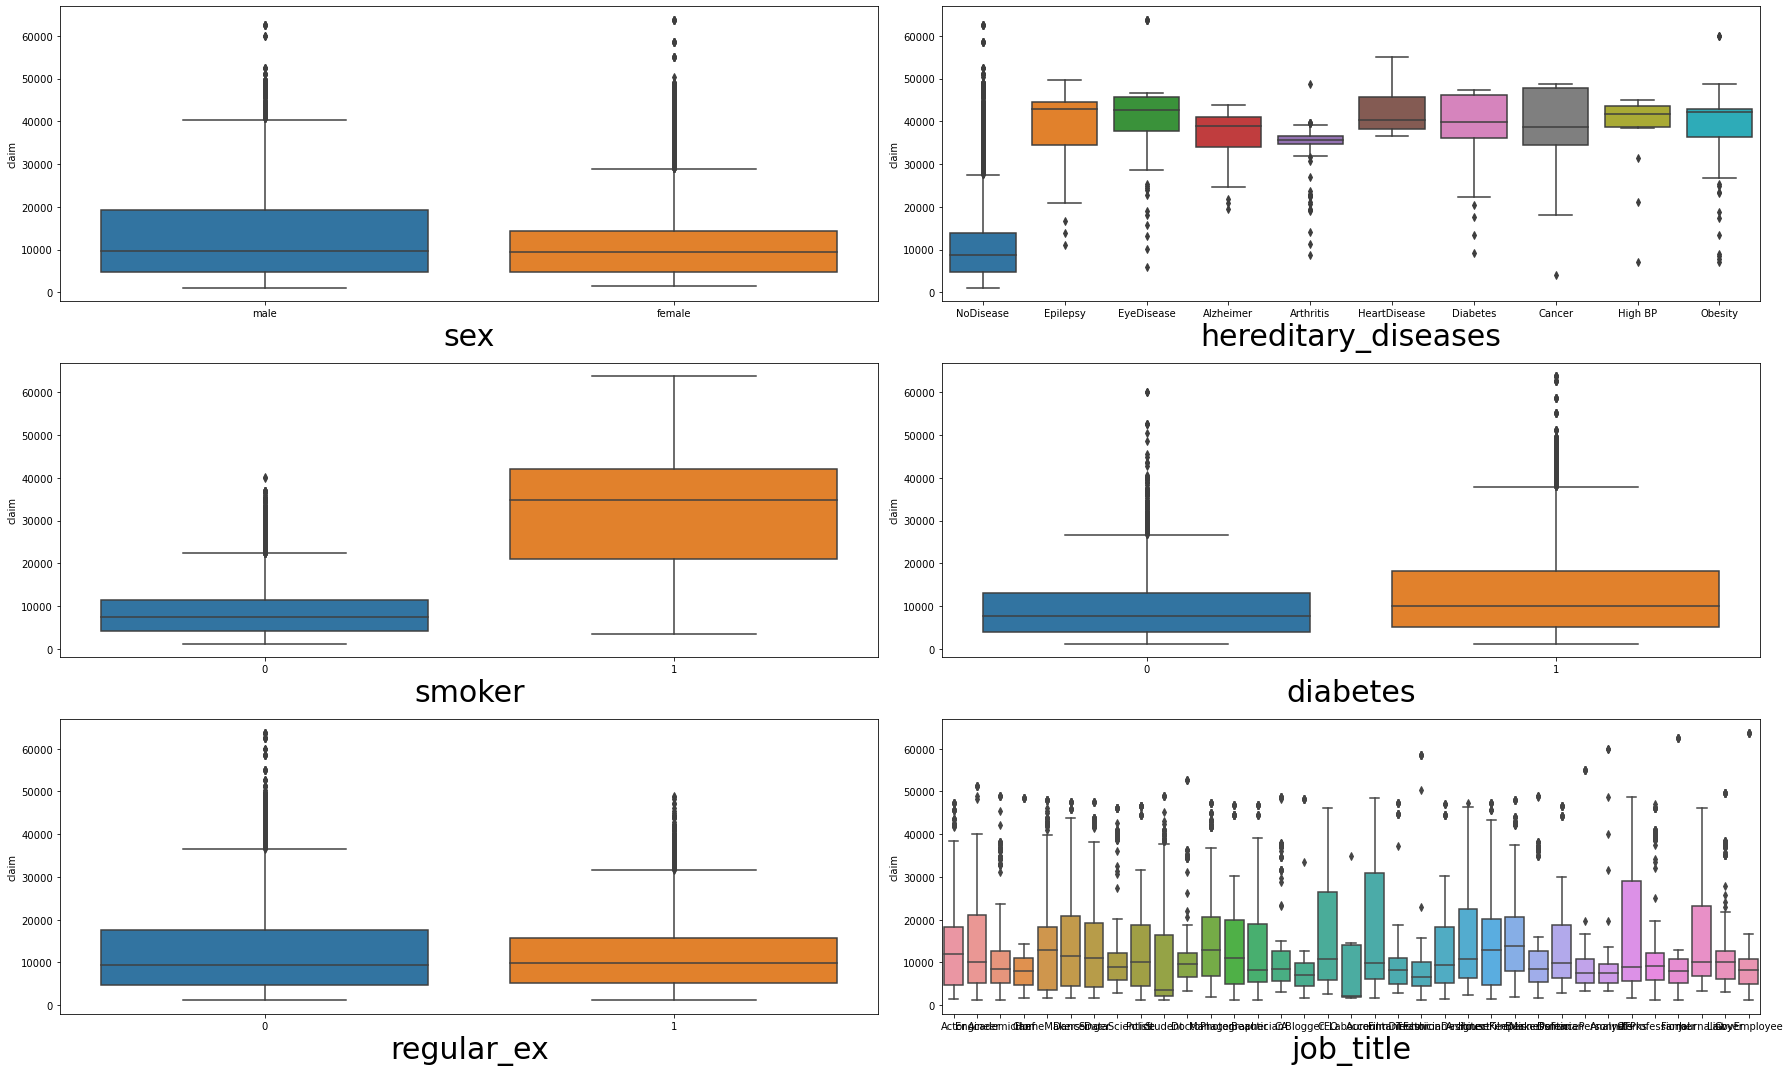

In [319]:

fig, ax = plt.subplots(3, 2, figsize=(25, 15))

# plot a boxplot for all the categorical variables 
for variable, subplot in zip(df_cat, ax.flatten()):
    
    
    boxplt = sns.boxplot(x=variable, y='claim', data=df, ax=subplot)
    
    
    boxplt.set_xlabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show() 

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b><ul>
                        <li>We can see that 'hereditary_diseases' variable with 'NoDisease' class have very low average claim amount than other diseases. We can also see that there is a little variance in average claim cost between 'hereditary_diseases'</li>
<br>                       <li>The distribution of claim between the two categories, 'smoker'(1) and 'non-smoker'(0), are distinct enough to take smokers as a potentially good predictor of the claim amount. We can see that a 'non-smoker' has a median claim amount of around 10000 while a 'smoker' has a median claim of 40000.</li> <br>
                        <li> Also diabetic people have slightly higher average claim amount than non-diabetic people </li><br>
                        <li>This visualization helps us understand that there is a variance in average claim cost between different cities. However, the median claim cost is about 10000. As we can see, there are large number of cities and its not easy to interpret. Therefore we’ll combine all the cities into the region</li>
                        </ul></b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='Feature_Engineering'></a>
###  Feature Engineering

Create a new feature 'region' by combining the cities.

**There are 91 unique cities. We will divide these cities into North-East, West, Mid-West, and South regions.**

In [320]:
df['city'].unique()

array(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
       'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield',
       'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick',
       'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford',
       'Worcester', 'Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
       'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh',
       'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville',
       'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity',
       'Kingsport', 'Marshall', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Ox

Let's create a new variable region. We will replace the original variable `city` with it.

In [321]:
# create a region column and combine the north-east cities
df['region'] = df['city'].replace(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
                                                       'AtlanticCity','Portland', 'Cambridge', 'Hartford', 
                                                       'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton',
                                                       'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg',
                                                       'Newport', 'Stamford', 'Worcester'],
                                                      'North-East')

In [322]:
df['region'].unique()

array(['North-East', 'Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
       'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh',
       'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville',
       'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity',
       'Kingsport', 'Marshall', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside',
       'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno', 'LasVegas',
       'Tucson', 'SanLuis', 'Denver', 'Kingman', 'Bakersfield',
       'Mexicali', 'SilverCity', 'Pheonix', 'SantaFe', 'Lovelock'],
      dtype=object)

In [323]:
# combine all the southern cities into the 'region' column
df['region'] = df['region'].replace(['Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
                                                         'Louisville', 'Memphis', 'Nashville', 'NewOrleans',
                                                         'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando',
                                                         'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami',
                                                         'Tampa', 'PanamaCity', 'Kingsport', 'Marshall'],
                                                         'Southern')

In [324]:
df['region'].unique()

array(['North-East', 'Southern', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside',
       'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno', 'LasVegas',
       'Tucson', 'SanLuis', 'Denver', 'Kingman', 'Bakersfield',
       'Mexicali', 'SilverCity', 'Pheonix', 'SantaFe', 'Lovelock'],
      dtype=object)

In [325]:
# combine all the mid-west cities into the 'region' column
df['region'] = df['region'].replace(['Mandan', 'Waterloo', 'IowaCity', 'Columbia',
                                                         'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
                                                         'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
                                                         'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 
                                                         'Canton', 'Columbus', 'Rochester', 'Minneapolis', 
                                                         'JeffersonCity', 'Escabana','Youngstown'],
                                                         'Mid-West')

In [326]:
df['region'].unique()

array(['North-East', 'Southern', 'Mid-West', 'SantaRosa', 'Eureka',
       'SanFrancisco', 'SanJose', 'LosAngeles', 'Oxnard', 'SanDeigo',
       'Oceanside', 'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno',
       'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman',
       'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix', 'SantaFe',
       'Lovelock'], dtype=object)

In [327]:
# combine all the western cities into the 'region' column
df['region'] = df['region'].replace(['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose',
                                                         'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside', 
                                                         'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno',
                                                         'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman',
                                                         'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix',
                                                         'SantaFe', 'Lovelock'],
                                                         'West')

In [328]:

df['region'].value_counts()

Southern      4444
West          4273
North-East    3471
Mid-West      2812
Name: region, dtype: int64

In [329]:
# drop the 'city' variable from the dataset using drop()

df = df.drop(['city'], axis=1)

Check whether the new variable added into the data frame or not.

In [330]:
# display the top 5 rows of the dataframe
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim,region
0,60.0,male,64,24.3,NoDisease,1,0,72,0,0,Actor,13112.6,North-East
1,49.0,female,75,22.6,NoDisease,1,0,78,1,1,Engineer,9567.0,North-East
2,32.0,female,64,17.8,Epilepsy,2,1,88,1,1,Academician,32734.2,North-East
3,61.0,female,53,36.4,NoDisease,1,1,72,1,0,Chef,48517.6,North-East
4,19.0,female,50,20.6,NoDisease,0,0,82,1,0,HomeMakers,1731.7,North-East


#### Analyze relationship between region and claim variable

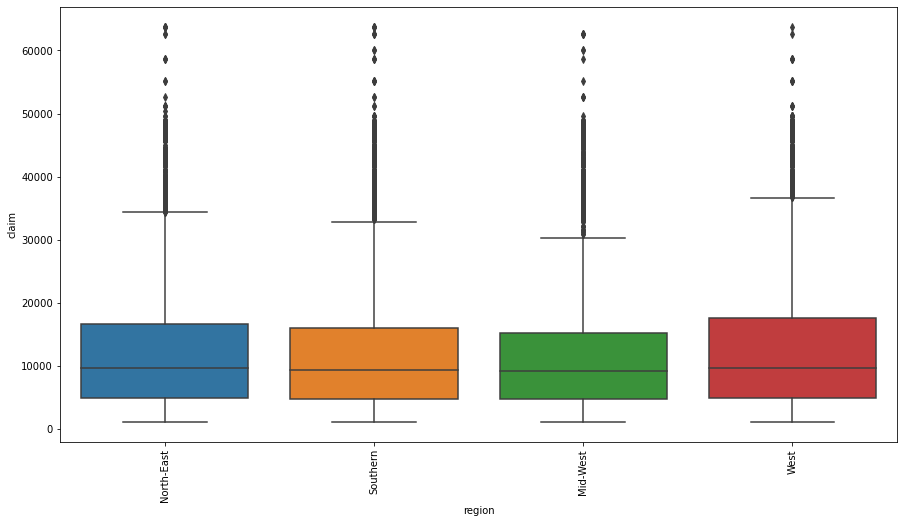

In [331]:
# set figure size
plt.figure(figsize=(15,8))

sns.boxplot(x="region", y="claim", data=df)

plt.xticks( rotation=90)

# show the plot
plt.show()

The plot shows that there is not much significant difference in the variance of the insurance claim across the regions.

<a id='outliers'></a>
###  Discover Outliers



**Recollect that one of the assumptions of Linear Regression is there should be no outliers present in the data**

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to detect outliers in numerical data, we perform the following:<br>
                    1. Plot boxplot for numerical data<br>
                    2. Note the variables for which outliers are present<br>
                    3. Remove outliers by IQR method<br> 
                    4. Plot boxplot to recheck for outliers</b> <br><br>
                </font>
            </div>
        </td>
    </tr>
</table>

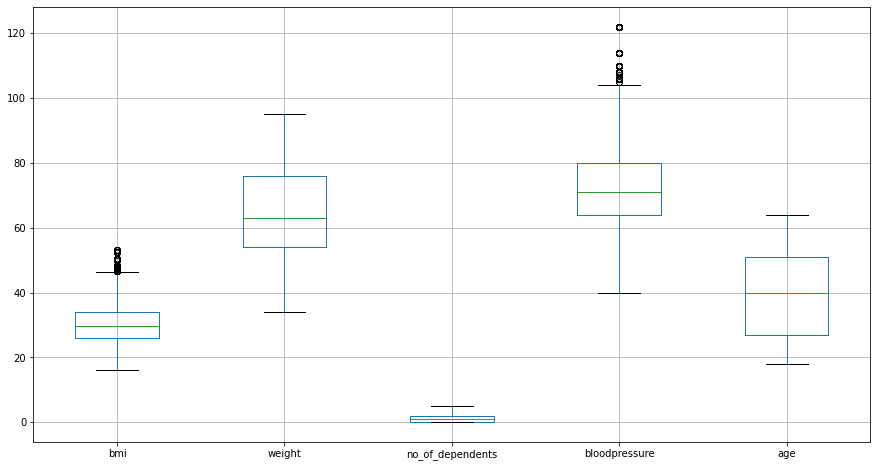

In [332]:
# set the plot size
plt.rcParams['figure.figsize']=(15,8)


df_num.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'])

# to display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we notice that for the variable 'bmi' and 'bloodpressure' there are points above the upper extreme - these points are outliers<br>

Let us use the IQR method to remove the outliers</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>



<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Outliers can also be detected using standard deviation method if we know that the distribution of values in the sample is Gaussian or Gaussian-like</b> <br><br>
                </font>
            </div>
        </td>
    </tr>
</table>

In [333]:
df_num.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
0,60.0,64,24.3,1,72,13112.6
1,49.0,75,22.6,1,78,9567.0
2,32.0,64,17.8,2,88,32734.2
3,61.0,53,36.4,1,72,48517.6
4,19.0,50,20.6,0,82,1731.7


In [334]:

Q1 = df_num.drop(['claim'], axis=1).quantile(0.25)

Q3 = df_num.drop(['claim'], axis=1).quantile(0.75)


IQR = Q3 - Q1

# print the IQR values for numeric variables
print(IQR)

age                 24.0
weight              22.0
bmi                  8.2
no_of_dependents     2.0
bloodpressure       16.0
dtype: float64


In [335]:
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (use "0" for 'index')
df = df[~((df < (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).any(axis=1)]

A simple way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed

In [336]:
# check the shape of data using shape
df.shape

(14723, 13)

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>So that the above output shows there is a reduction in the number of rows(from 15000 to 14723). Now, to confirm that the outliers have been removed let us visualize using a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

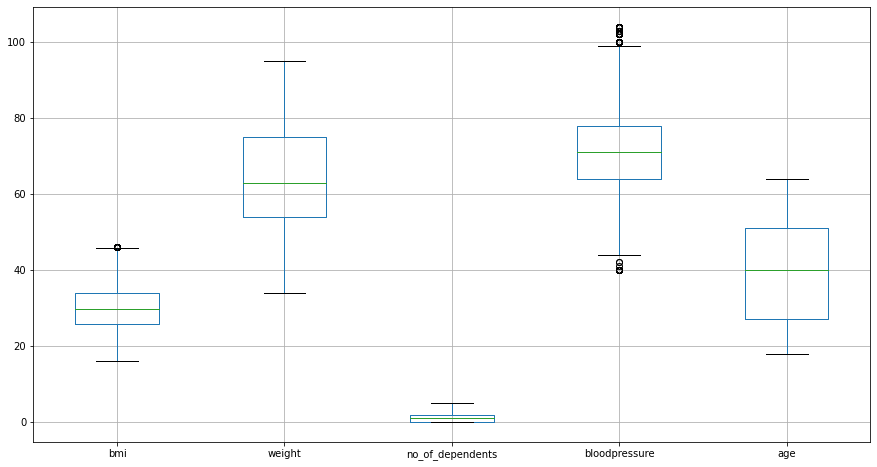

In [337]:
# set figure size 
plt.rcParams['figure.figsize']=(15,8)

# recheck for outliers
# column: selects the specifies columns
df.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'])

# display only the plot
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that you see are moderate outliers that lie within the min/max range before removing the actual outliers

<a id='Recheck_Correlation'></a>
###  Recheck the Correlation
Recheck the correlation after treating outliers. An outlier might either decrease or increase a correlation coefficient, depending on where it is in relation to the other points

In [338]:
# filter the numerical features in the dataset
# include=np.number: selects the numeric features
df_num = df.select_dtypes(include=np.number)

# display the numeric features
df_num.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

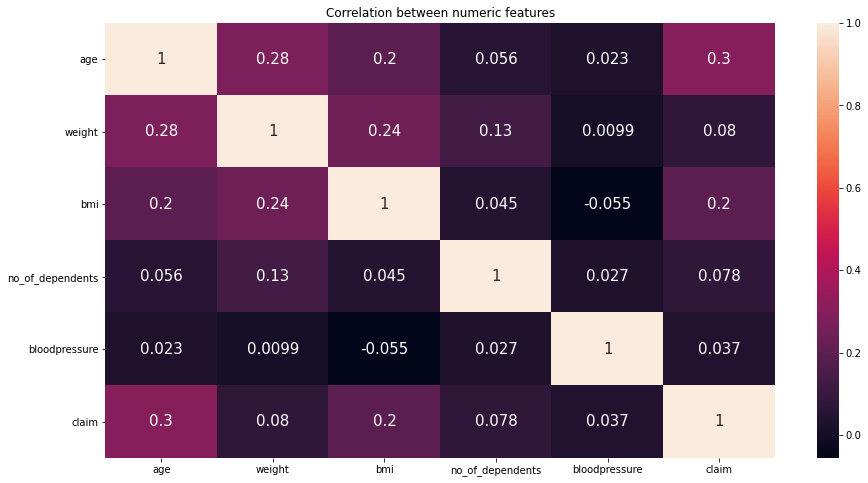

In [339]:

plt.figure(figsize=(15, 8))

sns.heatmap(df_num.corr(),annot = True, annot_kws={"size": 15})


plt.title('Correlation between numeric features')

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It is seen that the numeric variables are not correlated with each other even after removing the outliers since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data <br><br>
                       <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Normality'></a>
### Check for Normality

As per the assumptions of linear regression, residuals (actual values - predicted values) should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed, thus we check the normality only for target variable.

**1. Plot a histogram and also perform the Jarque-Bera test**

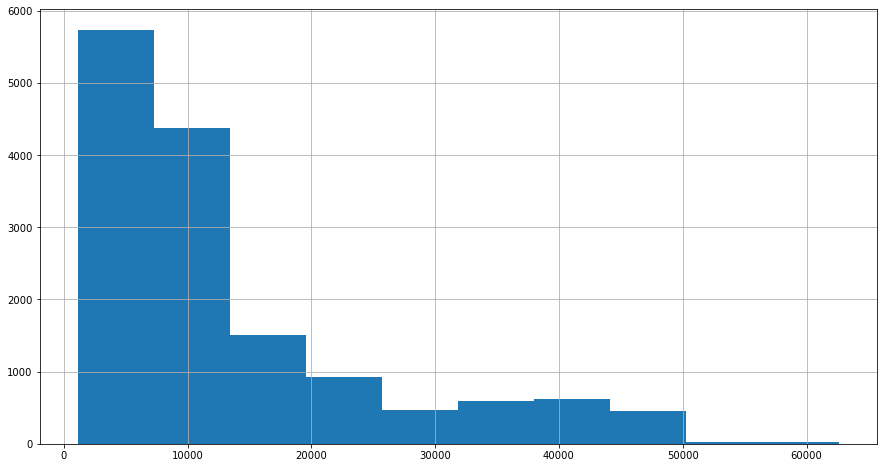

In [340]:
# check the distribution of target variable using hist()
df.claim.hist()

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we can notice that the variable 'claim' is heavily right skewed and not normally distributed<br>
<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>




<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us perform the Jarque-Bera test to check the normality of the target variable.

The null and alternate hypothesis of Jarque-Bera test are as follows: <br>
    
    H0: The data is normally distributed
    H1: The data is not normally distributed

In [341]:
import scipy
from scipy import stats

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms


In [342]:
from scipy.stats import f_oneway

from scipy.stats import jarque_bera

In [343]:
stat, p = jarque_bera(df["claim"])

print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=6571.030, p-value=0.000
The data is not normally distributed (reject H0)


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the data is not normally distributed.<br><br>
                        Now we opt for log transformation in order to reduce the skewness. We will log transform the claim variable. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Usually for testing the normality of data, the Shaprio Wilk Test is used. However, it does not work if the number of observations are more than 5000 inspite it being more robust than other tests. In case where the observations are more than 5000, other tests like Anderson Darling test or Jarque Bera test may also be used. So we have used Jarque Bera test</b>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

 If the data is not normally distributed, use log transformation to get near normally distributed data**

As mentioned above we opt for log transformation. The log transformation can be used to make highly skewed distributions less skewed. We use np.log() to log transform the 'claim' variable. We also store the transformed variable into our data frame with a new name, 'log_claim'.

In [344]:
# log transformation for normality using np.log()
df['log_claim'] = np.log(df['claim'])

# display first 5 rows of the data
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim,region,log_claim
0,60.0,male,64,24.3,NoDisease,1,0,72,0,0,Actor,13112.6,North-East,9.481329
1,49.0,female,75,22.6,NoDisease,1,0,78,1,1,Engineer,9567.0,North-East,9.166075
2,32.0,female,64,17.8,Epilepsy,2,1,88,1,1,Academician,32734.2,North-East,10.396176
3,61.0,female,53,36.4,NoDisease,1,1,72,1,0,Chef,48517.6,North-East,10.789682
4,19.0,female,50,20.6,NoDisease,0,0,82,1,0,HomeMakers,1731.7,North-East,7.456859


 Recheck for normality by plotting histogram and performing Jarque-Bera test**

Let us first plot a histogram of `log_claim`

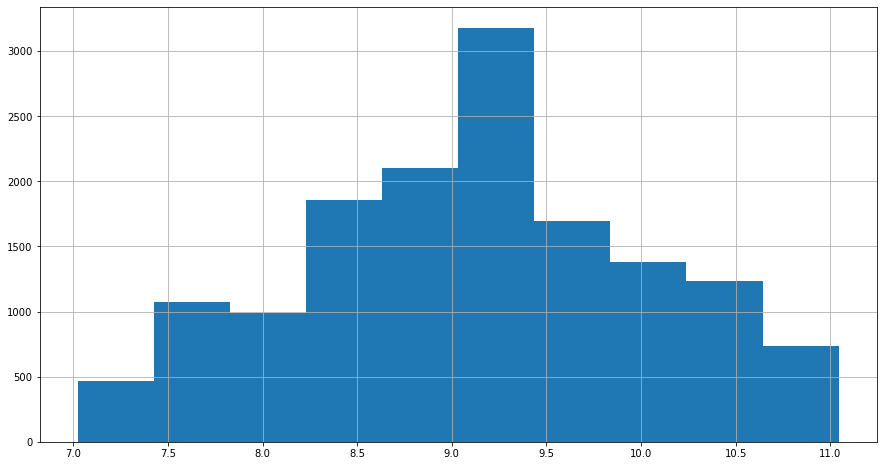

In [345]:
# recheck for normality 
# plot the histogram using hist
df.log_claim.hist()

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be seen that the variable claim is near normally distributed. However we again confirm by Jarque Bera test</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be visually seen that the data has near-normal distribution, but Jarque Bera test does not support the claim
<br>                    
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='one_way_anova'></a>
### 4.2.2 One-Way Anova 

Perform One-Way ANOVA to compare two means from two independent (unrelated) groups. For example, we apply ANOVA to see whether the mean of claim is significantly different across gender<br>

The null and alternate hypothesis of one-way anova are as follows:<br>

    H0: Population means all are equal
    H1: Population means are not all equal

#### One Way Anova for 'Sex' on 'Claim'

In [347]:
# perform one way anova for sex on claim using f_oneway()
f_oneway(df['claim'][df['sex'] == 'male'], 
             df['claim'][df['sex'] == 'female'])

F_onewayResult(statistic=68.99835913263617, pvalue=1.070652488972223e-16)

The F-statistic = 68.99 and the p-value < 0.05, which indicates that there is a significant difference in the mean of the insurance claim across gender. We may consider building separate models for each gender. However, in this example we go ahead and build a single model for both genders.

<a id='dummy'></a>
###  Dummy Encoding of Categorical Variables

In [348]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_num = df.select_dtypes(include=np.number)

# display the numeric features
df_num.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim',
       'log_claim'],
      dtype='object')

In [349]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_cat = df.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns

Index(['sex', 'hereditary_diseases', 'smoker', 'diabetes', 'regular_ex',
       'job_title', 'region'],
      dtype='object')

** Dummy encode the catergorical variables**

In [350]:
df_cat1= pd.get_dummies(df_cat, drop_first=True)
df_cat1.head()

,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,...,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [351]:
df_cat1= pd.get_dummies(df_cat, drop_first=True)
    


In [352]:

df_insurance_dummy = pd.concat([df_num, df_cat1], axis=1)


df_insurance_dummy.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,...,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
0,60.0,64,24.3,1,72,13112.6,9.481329,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,49.0,75,22.6,1,78,9567.0,9.166075,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,32.0,64,17.8,2,88,32734.2,10.396176,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,61.0,53,36.4,1,72,48517.6,10.789682,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19.0,50,20.6,0,82,1731.7,7.456859,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us now proceed to train models. One model with the original claim variable and another model with the log transformed claim variable. We shall begin by fitting a linear regression model using the method of ordinary least square(OLS) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='LinearRegression'></a>
## 5. Linear Regression (OLS)

<a id='withLog'></a>
### Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

** Split the data into training and test sets**

In [353]:
from sklearn.model_selection import train_test_split

In [354]:

df_insurance_dummy = sm.add_constant(df_insurance_dummy)

X = df_insurance_dummy.drop(['claim','log_claim'], axis=1)

y = df_insurance_dummy[['log_claim','claim']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print("The shape of X_train is:",X_train.shape)

print("The shape of X_test is:",X_test.shape)

print("The shape of y_train is:",y_train.shape)

print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (11042, 56)
The shape of X_test is: (3681, 56)
The shape of y_train is: (11042, 2)
The shape of y_test is: (3681, 2)


In [355]:
linreg_full_model_withlog = sm.OLS(y_train["log_claim"], X_train).fit()

print(linreg_full_model_withlog.summary())

                            OLS Regression Results                            
Dep. Variable:              log_claim   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     584.1
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:41:50   Log-Likelihood:                -7083.9
No. Observations:               11042   AIC:                         1.428e+04
Df Residuals:                   10986   BIC:                         1.469e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 74.5% of the variation in dependent variable claim.The Durbin-Watson test statistics is 2.008 and indicates that there is no autocorrelation. The Condition Number 4610 suggests that there is severe collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [356]:

linreg_full_model_withlog_predictions = linreg_full_model_withlog.predict(X_test)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Note that the predicted values are log transformed claim. In order to get claim values, we take the antilog of these predicted values by using the function np.exp()
</b>
                </font>
            </div>
        </td>
    </tr>
</table>



In [357]:
# take the exponential of predictions using np.exp()
predicted_claim = np.exp(linreg_full_model_withlog_predictions)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

In [358]:
from sklearn.metrics import mean_squared_error

In [359]:
# calculate rmse using rmse()
linreg_full_model_withlog_rmse = mean_squared_error(actual_claim, predicted_claim)

linreg_full_model_withlog_rmse=np.sqrt(linreg_full_model_withlog_rmse )

# calculate R-squared using rsquared
linreg_full_model_withlog_rsquared = linreg_full_model_withlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withlog_rsquared_adj = linreg_full_model_withlog.rsquared_adj 

In [360]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

# print the score card
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE


In [361]:
# compile the required information
linreg_full_model_withlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model with log of target variable",
                     'RMSE':linreg_full_model_withlog_rmse,
                     'R-Squared': linreg_full_model_withlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withlog_rsquared_adj     
                   })

score_card = score_card.append(linreg_full_model_withlog_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055


<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us also take a look at building a linear regression full model without performing any kind of transformation on target variable
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='withoutLog'></a>
### 5.2 Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

**1. Build model using sm.OLS().fit()**

In [362]:


# build a full model using OLS()
linreg_full_model_withoutlog = sm.OLS(y_train['claim'], X_train).fit()

# print the summary output
print(linreg_full_model_withoutlog.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     651.8
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:41:51   Log-Likelihood:            -1.1150e+05
No. Observations:               11042   AIC:                         2.231e+05
Df Residuals:                   10986   BIC:                         2.235e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 76.5% of the variation in dependent variable claim.The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 4610 suggests that there is severe collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


#### Calculate the p-values to know the insignificant variables

In [363]:

linreg_full_model_withoutlog_pvalues = pd.DataFrame(linreg_full_model_withoutlog.pvalues, columns=["P-Value"])

linreg_full_model_withoutlog_pvalues

,P-Value
const,3.159768e-02
age,0.000000e+00
weight,3.359551e-18
bmi,8.388984e-97
no_of_dependents,3.481205e-25
bloodpressure,1.030555e-06
sex_male,9.913783e-01
hereditary_diseases_Arthritis,7.119022e-03
hereditary_diseases_Cancer,4.373472e-01
hereditary_diseases_Diabetes,7.693355e-03


The above table shows the p-values for all the variables to decide the significant variables

Let's create a list of insignificant variables

In [364]:
# select insignificant variables
insignificant_variables = linreg_full_model_withoutlog_pvalues[
                                                        linreg_full_model_withoutlog_pvalues['P-Value']  > 0.05]

# get the position of a specified value
insigni_var = insignificant_variables.index

# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

# get the list of insignificant variables
insigni_var

['sex_male',
 'hereditary_diseases_Cancer',
 'hereditary_diseases_Epilepsy',
 'hereditary_diseases_Obesity',
 'job_title_Accountant',
 'job_title_Actor',
 'job_title_Architect',
 'job_title_Beautician',
 'job_title_Blogger',
 'job_title_Buisnessman',
 'job_title_CA',
 'job_title_CEO',
 'job_title_Chef',
 'job_title_Clerks',
 'job_title_Dancer',
 'job_title_DefencePersonnels',
 'job_title_Farmer',
 'job_title_FashionDesigner',
 'job_title_FilmDirector',
 'job_title_FilmMaker',
 'job_title_GovEmployee',
 'job_title_HomeMakers',
 'job_title_HouseKeeper',
 'job_title_ITProfessional',
 'job_title_Journalist',
 'job_title_Labourer',
 'job_title_Lawyer',
 'job_title_Police',
 'job_title_Technician',
 'region_North-East',
 'region_Southern',
 'region_West']

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> These are the insignificant variables because their p-value is greater than 0.05.<br><br>

Notice, the variable 'sex_male' is insignificant. It implies that a persons gender does not affect the claim. Hence, we shall consider this variable to be insignificant.<br><br>
Out of the 9 hereditary diseases, there are 3 diseases which are insignificant. Considering, 'hereditary diseases' as whole we must include it in the data. <br><br>
There are 25, out of the total 35, professions/designations which are insignificant. Hence, it can be considered as redundant variable.<br><br>
Similarly for the variable region only 1 region is significantly contributing to the target variable. So we shall exclude the variable.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**2. Predict the values using test set**

In [365]:
# predict the claim using predict()
predicted_claim = linreg_full_model_withoutlog.predict(X_test)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

**3. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [366]:
# calculate rmse using rmse()
linreg_full_model_withoutlog_rmse = mean_squared_error(actual_claim, predicted_claim)

linreg_full_model_withoutlog_rmse = np.sqrt(linreg_full_model_withoutlog_rmse)


linreg_full_model_withoutlog_rsquared = linreg_full_model_withoutlog.rsquared

linreg_full_model_withoutlog_rsquared_adj = linreg_full_model_withoutlog.rsquared_adj 

**4. Tabulate the results**

In [367]:
# compile the required information
linreg_full_model_withoutlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model without log of target variable",
                     'RMSE':linreg_full_model_withoutlog_rmse,
                     'R-Squared': linreg_full_model_withoutlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withoutlog_rsquared_adj     
                   })


score_card = score_card.append(linreg_full_model_withoutlog_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> On comparing the above models, it is seen that the R-squared and the Adjusted R-squared value for the model considering log transformation of the variable 'claim' is lower than the other model. And, the RMSE value of the model without considering the log transformation is considerably lower. So, we continue with variable 'claim' as it is, instead of opting for log transformation
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Finetuning'></a>
##  Fine Tune Linear Regression Model (OLS)

<a id='RemovingInsignificantVariable'></a>
###  Linear Regression after Removing Insignificant Variable (OLS)

The null and alternate hypothesis of linear regression as follows: <br>
    
    H0: All beta coefficients are zero
    H1: At least one beta coefficient is not zero

From the summary output of our linear regression model in section 5.2, we notice some of the variables are insignificant.

Now, we go ahead and build our next model without considering the above mentioned insignificant variables.

** Consider the significant variables**

In [368]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim,region,log_claim
0,60.0,male,64,24.3,NoDisease,1,0,72,0,0,Actor,13112.6,North-East,9.481329
1,49.0,female,75,22.6,NoDisease,1,0,78,1,1,Engineer,9567.0,North-East,9.166075
2,32.0,female,64,17.8,Epilepsy,2,1,88,1,1,Academician,32734.2,North-East,10.396176
3,61.0,female,53,36.4,NoDisease,1,1,72,1,0,Chef,48517.6,North-East,10.789682
4,19.0,female,50,20.6,NoDisease,0,0,82,1,0,HomeMakers,1731.7,North-East,7.456859


In [369]:
# drop the insignificant variables
X_significant = df.drop(["sex","job_title","region","claim","log_claim"], axis=1)

In [370]:

df_significant_categoric_features = X_significant.select_dtypes(include=[np.object])

# display categorical features
df_significant_categoric_features.columns

Index(['hereditary_diseases', 'smoker', 'diabetes', 'regular_ex'], dtype='object')

**Dummy encode the catergorical variables**

In [371]:
dummy_encoded_variables = pd.get_dummies(df_significant_categoric_features,  drop_first=True)
    
dummy_encoded_variables.head()

,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,1
2,0,0,0,1,0,0,0,0,0,1,1,1
3,0,0,0,0,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,0,1,0,0,1,0


In [372]:
df_num.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim
0,60.0,64,24.3,1,72,13112.6,9.481329
1,49.0,75,22.6,1,78,9567.0,9.166075
2,32.0,64,17.8,2,88,32734.2,10.396176
3,61.0,53,36.4,1,72,48517.6,10.789682
4,19.0,50,20.6,0,82,1731.7,7.456859


**Concatenate numerical and dummy encoded categorical variables**

In [373]:

df_insurance_significant = pd.concat([df_num,dummy_encoded_variables], axis=1)

# display data with dummy variables
df_insurance_significant.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1
0,60.0,64,24.3,1,72,13112.6,9.481329,0,0,0,0,0,0,0,1,0,0,0,0
1,49.0,75,22.6,1,78,9567.0,9.166075,0,0,0,0,0,0,0,1,0,0,1,1
2,32.0,64,17.8,2,88,32734.2,10.396176,0,0,0,1,0,0,0,0,0,1,1,1
3,61.0,53,36.4,1,72,48517.6,10.789682,0,0,0,0,0,0,0,1,0,1,1,0
4,19.0,50,20.6,0,82,1731.7,7.456859,0,0,0,0,0,0,0,1,0,0,1,0


**2. Split the data into training and test sets**

In [374]:

df_insurance_significant = sm.add_constant(df_insurance_significant)


X = df_insurance_significant.drop(['claim','log_claim'], axis=1)

# extract the target variable from the data set
y = df_insurance_significant[['log_claim','claim']]

X_train_significant, X_test_significant, y_train, y_test = train_test_split(X, y, random_state=1)



# print dimension of predictors train set
print("The shape of X_train is:",X_train_significant.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test_significant.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (11042, 18)
The shape of X_test is: (3681, 18)
The shape of y_train is: (11042, 2)
The shape of y_test is: (3681, 2)


**1. Build model using sm.OLS().fit()**

In [375]:
# build a full model with significant variables using OLS()
linreg_model_with_significant_var = sm.OLS(y_train['claim'], X_train_significant).fit()

# to print the summary output
print(linreg_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     2064.
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:41:52   Log-Likelihood:            -1.1160e+05
No. Observations:               11042   AIC:                         2.232e+05
Df Residuals:                   11024   BIC:                         2.234e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 76.1% of the variation in dependent variable claim.The Durbin-Watson test statistics is  1.982 and indicates that there is no autocorrelation. The Condition Number is 3670 suggests that there is severe collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [376]:
# predict the 'claim' using predict()
predicted_claim = linreg_model_with_significant_var.predict(X_test_significant)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

In [377]:
# calculate rmse using rmse()
linreg_model_with_significant_var_rmse = mean_squared_error(actual_claim, predicted_claim)

linreg_model_with_significant_var_rmse=np.sqrt(linreg_model_with_significant_var_rmse)

linreg_model_with_significant_var_rsquared = linreg_model_with_significant_var.rsquared

linreg_model_with_significant_var_rsquared_adj = linreg_model_with_significant_var.rsquared_adj 

**4. Tabulate the results**

In [378]:
# compile the required information
linreg_model_with_significant_var_metrics = pd.Series({
                     'Model_Name': "Linreg full model with significant variables",
                     'RMSE': linreg_model_with_significant_var_rmse,
                     'R-Squared': linreg_model_with_significant_var_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_var_rsquared_adj     
                   })


score_card = score_card.append(linreg_model_with_significant_var_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
2,Linreg full model with significant variables,0.760924,0.760555,5911.155096


<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Occams razor is a principle to explain the phenomena by the simplest hypothesis possible. Our last model where we have removed the insignificant variables is performimg very close to the other models inspite of having lesser number of variables. Using Occams razor principle, we accept the model in which we consider the model with significant variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Assumptions'></a>
###  Check the Assumptions of the Linear Regression

Now we perform test for checking presence of Autocorrelation and Heteroskedasticity.

<a id='Autocorrelation'></a>
### Detecting Autocorrelation


<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We can also find out the p-value associated with the Durbin-Watson statistic from Durbin_Watson table in order to reject or fail to reject the null hypothesis. Reference URL: <a href="https://bit.ly/36DJDR8">Durbin-Watson Table</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Heteroskedasticity'></a>
### Detecting Heteroskedasticity
Heteroskedasticity is a systematic change in the spread of the residuals over the range of measured values. One of the assumptions of the linear regression is that there should not be Heteroskedasticity.

Breusch-Pagan is the test for detecting heteroskedasticity:

The null and alternate hypothesis of Breusch-Pagan test is as follows:<BR>
    
    H0: The residuals are homoskedastic
    H1: The residuals are not homoskedastic

In [379]:
from statsmodels.compat import lzip

In [380]:
# create vector of result parmeters
name = ['f-value','p-value']           

# perform Breusch-Pagan test using het_breushpagan()
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(linreg_model_with_significant_var.resid, linreg_model_with_significant_var.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
lzip(name, test)           

[('f-value', 1015.2273076491664), ('p-value', 4.976780161276515e-205)]

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data. In real life it might not be possible to meet all the assumptions of linear regression.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='Linearity_of_Residuals'></a>
### Linearity of Residuals

Multiple linear regression requires the relationship between the independent and dependent variables to be linear, i.e. it should be linear in the parameters. The linearity assumption can best be tested with scatterplots.<br><br>The independent variables must have a linear relationship with the dependent variable.

In [381]:
X_train_significant.head()

,const,age,weight,bmi,no_of_dependents,bloodpressure,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1
1163,1.0,30.0,79,43.100000,2,58,0,0,0,0,0,0,0,1,0,0,1,0
5615,1.0,58.0,55,24.300000,0,74,0,0,0,0,0,0,0,1,0,0,1,1
10109,1.0,63.0,80,36.900000,0,80,0,0,0,0,0,0,0,1,0,0,1,0
3256,1.0,18.0,52,31.400000,0,58,0,0,0,0,0,0,0,1,0,0,1,0
7087,1.0,40.0,80,30.266413,4,85,0,0,0,0,0,0,0,1,0,0,1,0


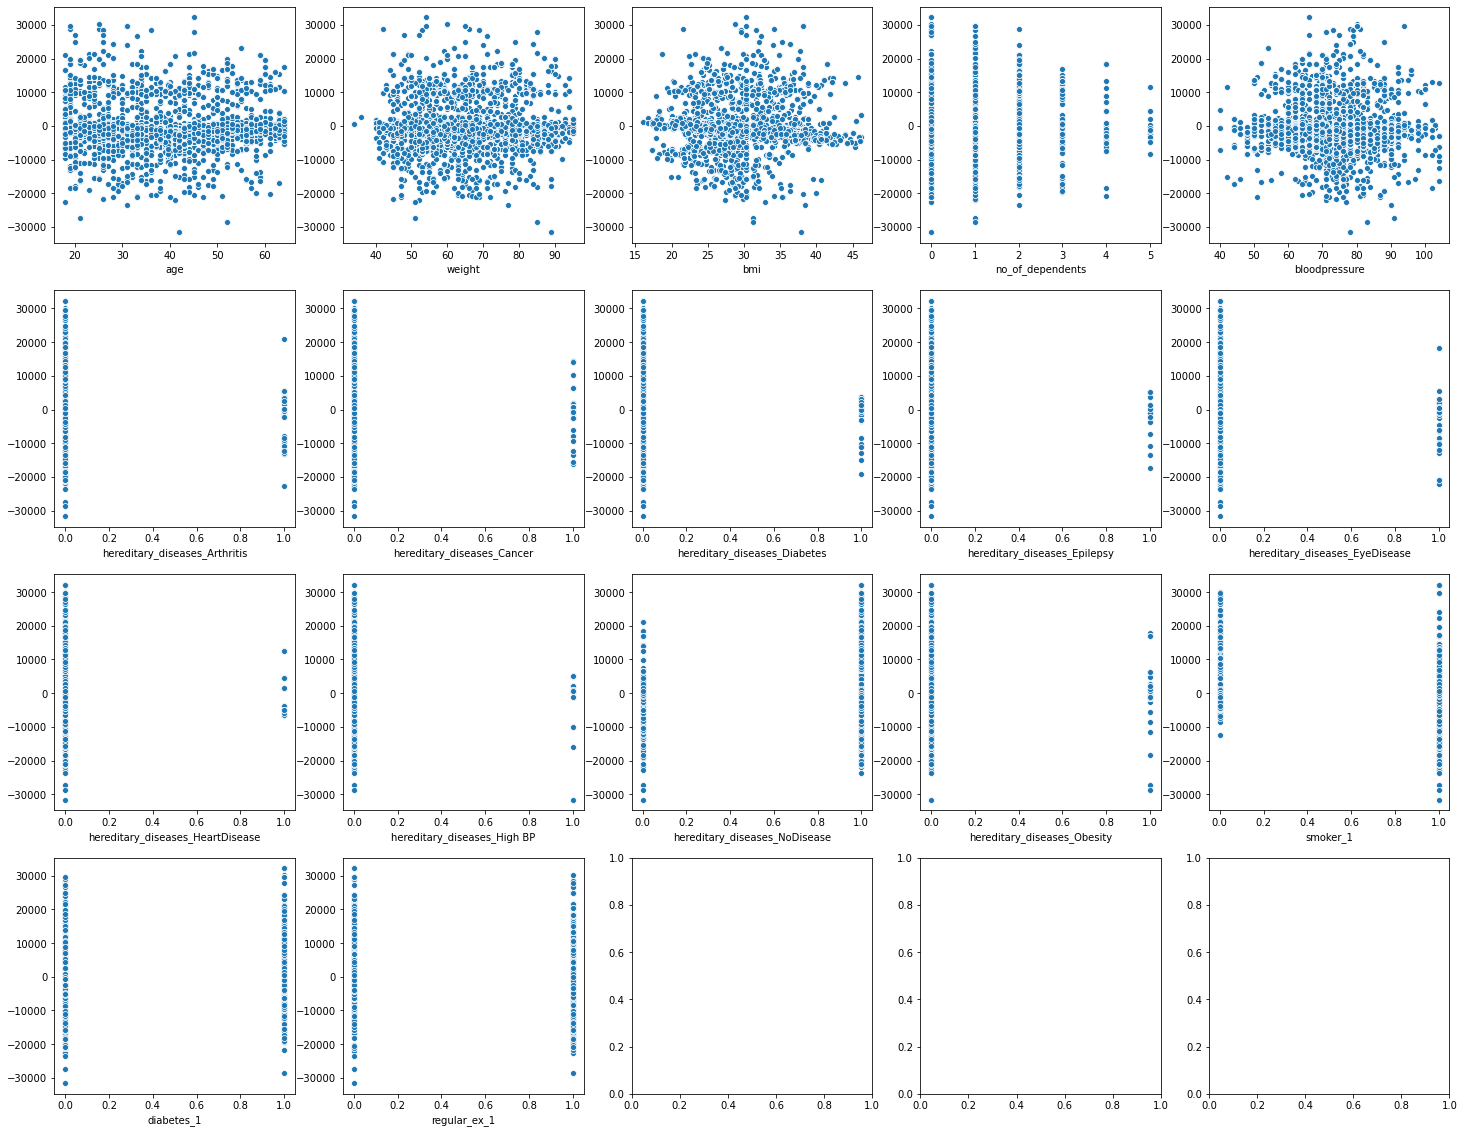

In [382]:
fig, ax = plt.subplots(nrows = 4, ncols= 5, figsize=(25, 20))


for variable, subplot in zip(X_train_significant.columns[1:], ax.flatten()):
    sns.scatterplot(X_train_significant[variable], linreg_model_with_significant_var.resid , ax=subplot)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Normality_of_Residuals'></a>
###  Normality of Residuals

The assumption of normality is an important assumption for many statistical tests. The normal Q-Q plot is one way to assess normality. This q-q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set.

In [383]:
from statsmodels.graphics.gofplots import qqplot

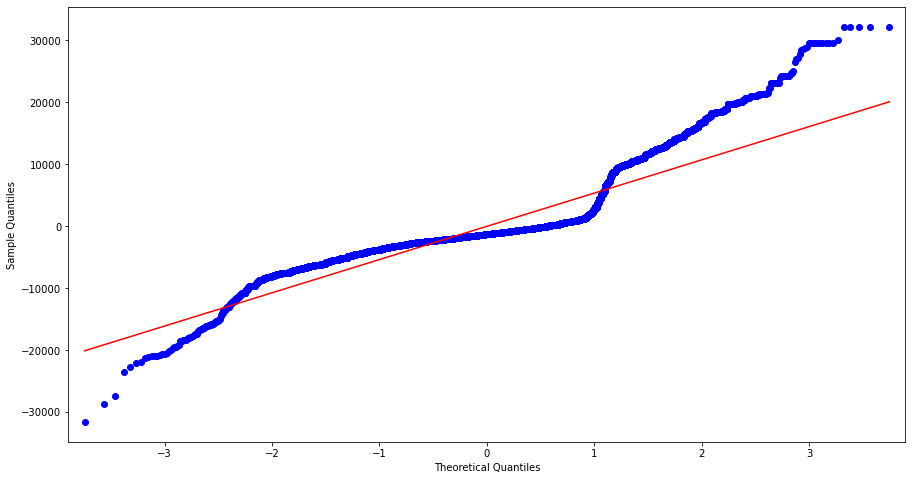

In [384]:
qqplot(linreg_model_with_significant_var.resid,line='r')
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Using this plot, we can infer that the residuals do not come from a normal distribution. This is possible since our target variable is not normally distributed.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**The mean of the residuals always equals zero (assuming that your line is actually the line of “best fit”)** 

In [385]:
# check the mean of the residual
linreg_model_with_significant_var.resid.mean()

-1.5996547321682863e-11

The mean of the residuals is very much closer to zero. Therefore, we can say that linearity is present.

<a id='RemovingInsignificantVariable_scaleddata'></a>
###  Linear Regression after Removing Insignificant Variable (OLS) - Scaled Data

** Perform standardization on train data**

In [386]:
nums=df_num.columns

nums

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim',
       'log_claim'],
      dtype='object')

In [387]:
df_num1=df_num.copy()
df_num1.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim
0,60.0,64,24.3,1,72,13112.6,9.481329
1,49.0,75,22.6,1,78,9567.0,9.166075
2,32.0,64,17.8,2,88,32734.2,10.396176
3,61.0,53,36.4,1,72,48517.6,10.789682
4,19.0,50,20.6,0,82,1731.7,7.456859


In [388]:
from sklearn.preprocessing import StandardScaler

s=StandardScaler()

df_num1[nums]=s.fit_transform(df_num1[nums])

df_num1.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim
0,1.471392,-0.057181,-1.020602,-0.097257,0.011459,-0.021345,0.403054
1,0.678744,0.747880,-1.320418,-0.097257,0.574439,-0.315679,0.055254
2,-0.546258,-0.057181,-2.166958,0.721915,1.512740,1.607517,1.412348
3,1.543451,-0.862242,1.113384,-0.097257,0.011459,2.917756,1.846479
4,-1.483024,-1.081804,-1.673143,-0.916429,0.949759,-0.966116,-1.830418


In [389]:
df_num_scaled=df_num1.copy()

In [390]:
df_cat1.head()

,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,...,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [391]:
df_insurance_scaled = pd.concat([df_num_scaled, df_cat1], axis = 1)

# add constant to the data
df_insurance_scaled =sm.add_constant(df_insurance_scaled)

In [392]:

mean_numeric_features = df_num.mean()

# store the standard deviation as 'std_numeric_features'
std_numeric_features = df_num.std()

**2. Split the data into training and test sets**

In [393]:

X = df_insurance_scaled.drop(['claim','log_claim'], axis=1)


y = df_insurance_scaled['claim']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, random_state=1)



# print dimension of predictors train set
print("The shape of X_train_scaled is:",X_train_scaled.shape)

# print dimension of predictors test set
print("The shape of X_test_scaled is:",X_test_scaled.shape)

# print dimension of target train set
print("The shape of y_train_scaled is:",y_train_scaled.shape)

# print dimension of target test set
print("The shape of y_test_scaled is:",y_test_scaled.shape)

The shape of X_train_scaled is: (11042, 56)
The shape of X_test_scaled is: (3681, 56)
The shape of y_train_scaled is: (11042,)
The shape of y_test_scaled is: (3681,)


**3. Consider only the significant variables**

In [394]:
X_train_scaled_significant = X_train_scaled.drop(insigni_var, axis=1)


X_test_scaled_significant = X_test_scaled.drop(insigni_var, axis=1)

**4. Build model using sm.OLS().fit()**

In [395]:
# ordinary least squares regression
# build a full model with significant scaled variables using OLS()
linreg_model_with_significant_scaled_vars = sm.OLS(y_train_scaled,X_train_scaled_significant).fit()

# to print the summary output
print(linreg_model_with_significant_scaled_vars.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1551.
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:42:02   Log-Likelihood:                -7773.1
No. Observations:               11042   AIC:                         1.559e+04
Df Residuals:                   11018   BIC:                         1.577e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 76.4% of the variation in dependent variable claim.The Durbin-Watson test statistics is  1.982 and indicates that the is no autocorrelation. The Condition Number is 30.4 suggests that there is no collinearity
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**5. Predict the values using test set**

In [396]:
# predict the 'claim' using predict()
predicted_claim = linreg_model_with_significant_scaled_vars.predict(X_test_scaled_significant)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

**6. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [397]:
# calculate rmse using rmse()
linreg_model_with_significant_scaled_vars_rmse = mean_squared_error(actual_claim, y_pred_unscaled)

linreg_model_with_significant_scaled_vars_rmse=np.sqrt(linreg_model_with_significant_scaled_vars_rmse)


# calculate R-squared using rsquared
linreg_model_with_significant_scaled_vars_rsquared = linreg_model_with_significant_scaled_vars.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_significant_scaled_vars_rsquared_adj = linreg_model_with_significant_scaled_vars.rsquared_adj 

**7. Tabulate the results**

In [398]:
# compile the required information
linreg_model_with_significant_scaled_vars_metrics = pd.Series({
                     'Model_Name': "Linreg with scaled significant variables",
                     'RMSE': linreg_model_with_significant_scaled_vars_rmse,
                     'R-Squared': linreg_model_with_significant_scaled_vars_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_scaled_vars_rsquared_adj     
                   })


score_card = score_card.append(linreg_model_with_significant_scaled_vars_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
2,Linreg full model with significant variables,0.760924,0.760555,5911.155096
3,Linreg with scaled significant variables,0.763999,0.763506,5923.417494


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> On comparing the above models, it is seen that the RMSE value for the model considering scaled data is higher than the other model. Also the R-squared and Adj. R-squared values have slightly reduced. So, for further analysis we use the unscaled data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Interaction'></a>
### 5.3.4 Linear Regression with Interaction (OLS)

Let us now see the effect on the linear regression model on adding an interaction effect of two significant variables

An interaction effect occurs when the effect of one variable depends on another variable. This combined effect may or may not improve the performance of the model

Comparing the coefficient of determination with and without the interaction term:<br>
The model for which interaction term is considered, the coefficient of determination may vary. It is crucial to check for the significance of the interaction term. If the term is found to be significant then the coefficient of determination increases. If the term is not significant, there is not much change in the coefficient of determination.
[Ref:https://bit.ly/2Nm0Wi7]


** Compute the interaction effect**

In [399]:
# create a copy of the entire dataset to add the interaction effect using copy()
df_insurance_interaction = df_insurance_dummy.copy()

# add the interaction variable
df_insurance_interaction['bmi*smoker'] = df_insurance_interaction['bmi']*df_insurance_interaction['smoker_1'] 

# print the data with interaction
df_insurance_interaction.head()

,const,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim,sex_male,hereditary_diseases_Arthritis,...,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West,bmi*smoker
0,1.0,60.0,64,24.3,1,72,13112.6,9.481329,1,0,...,0,0,0,0,0,0,1,0,0,0.0
1,1.0,49.0,75,22.6,1,78,9567.0,9.166075,0,0,...,0,0,0,0,0,0,1,0,0,0.0
2,1.0,32.0,64,17.8,2,88,32734.2,10.396176,0,0,...,0,0,0,0,0,0,1,0,0,17.8
3,1.0,61.0,53,36.4,1,72,48517.6,10.789682,0,0,...,0,0,0,0,0,0,1,0,0,36.4
4,1.0,19.0,50,20.6,0,82,1731.7,7.456859,0,0,...,0,0,0,0,0,0,1,0,0,0.0


In [400]:

X = df_insurance_interaction.drop(['claim','log_claim'], axis=1)

# extract the target variable from the train set
y = df_insurance_interaction['claim']


X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)

print("The shape of X_train_interaction is:",X_train_interaction.shape)

# print dimension of predictors test set
print("The shape of X_test_interaction is:",X_test_interaction.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (11042, 57)
The shape of X_test_interaction is: (3681, 57)
The shape of y_train is: (11042,)
The shape of y_test is: (3681,)


**3. Build model using sm.OLS().fit()**

In [401]:
# building a full model with an interaction term using OLS()
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()

# print the summary output
print(linreg_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     796.1
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:42:03   Log-Likelihood:            -1.1055e+05
No. Observations:               11042   AIC:                         2.212e+05
Df Residuals:                   10985   BIC:                         2.216e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 80.2% of the variation in dependent variable claim.The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 4620 suggests that there is severe collinearity. The collinearity is likely to increase because of the interaction effect.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**4. Predict the values using test set**

In [402]:
# predict the 'claim' using predict()
predicted_claim = linreg_with_interaction.predict(X_test_interaction)

# extract the 'claim' values from the test data
actual_claim = y_test

**5. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [403]:
# calculate rmse using rmse()
linreg_with_interaction_rmse = mean_squared_error(actual_claim, predicted_claim)

linreg_with_interaction_rmse=np.sqrt(linreg_with_interaction_rmse)


linreg_with_interaction_rsquared = linreg_with_interaction.rsquared


linreg_with_interaction_rsquared_adj = linreg_with_interaction.rsquared_adj 

**6. Tabulate the results**

In [404]:
# compile the required information
linreg_with_interaction_metrics = pd.Series({
                     'Model_Name': "linreg_with_interaction",
                     'RMSE': linreg_with_interaction_rmse,
                     'R-Squared': linreg_with_interaction_rsquared,
                     'Adj. R-Squared': linreg_with_interaction_rsquared_adj     
                   })


score_card = score_card.append(linreg_with_interaction_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
2,Linreg full model with significant variables,0.760924,0.760555,5911.155096
3,Linreg with scaled significant variables,0.763999,0.763506,5923.417494
4,linreg_with_interaction,0.802319,0.801311,5547.061558


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the summary output, the interaction component has a p-value of 0 indicating it is highly significant. The R-squared and adjusted R-squared value have also significantly increased. This output justifies that addition of an interaction effect has positively contributed to the performance of the model.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='regularization'></a>
## 6. Regularization (OLS)

Overfitting occurs when an algorithm fits the data too well.  Specifically, overfitting occurs if the algorithm shows low bias but high variance.  It is often a result of an excessively complicated model. This can be prevented by fitting multiple models and using cross-validation to compare their predictive accuracies on test data.

Underfitting occurs when an algorithm cannot capture the underlying trend of the data. Intuitively, it occurs when the algorithm does not fit the data well enough. Specifically, it occurs if the model or algorithm shows low variance but high bias. It is often a result of an excessively simple model

One of the challenge in machine learning is that our algorithm must perform well on new, previously unseen data - not just those on which our model was trained. This ability to perform well on previously unobserved data is called generalization. Generalization error is defined as the expected value of the error on a new data. Regularization is any modification we make to a learning algorithm that is intended to reduce it generalization error but not its training error. (Ref. Deep Learning by Ian Goodfellow, Yoshua Bengio, Aaron Courville)

<a id='Ridge_Regression'></a>
### 6.1 Ridge Regression (OLS)


<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Ridge regression is a technique for analyzing multiple regression data that suffers from multicollinearity <br><br>
                    <a href="https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db">Here is an article which sheds more light on ridge regression. Also describes underfitting and overfitting<br>
                    

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Split the data in the form of train and test sets**

We shall use the scaled data. The train test split is alread conducted for the scaled data.

We first create a list of all the variable names and accuracy metrics whose values we want.

In [408]:

# create list of variable names
col = list(X_train_scaled.columns)

# add 'Sum of square of Residuals' to the list
col.append('ssr')

# add 'R squared' to the list
col.append('R squared')

# add 'Adj. R squared' to the list
col.append('Adj. R squared')

# add 'Root mean Squared Error' to the list
col.append('RMSE')

In [409]:
# build a OLS model using OLS()
ridge_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted ridge model
results_fu = ridge_regression.fit()

Thus, we may say the model obtained by alpha = 0.0001 is performing the best since has the lowest root mean squared error.

**In ridge regression, coefficients may tend to zero yet are never zero. This can be checked by the follwing code**

In [410]:
# build a ridge model for the desired alpha 
# L1_wt=0: conducts ridge regression
# alpha: specifies the alpha value
# start_params: starting values for patameters
results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=0.0001, start_params=results_fu.params)

# fit the model 
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
ridge_regression_best = sm.regression.linear_model.OLSResults(model = ridge_regression, 
                                        params=results_fr.params, 
                                        normalized_cov_params=ridge_regression.normalized_cov_params)

# print the summary output 
print (ridge_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     651.8
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:48:43   Log-Likelihood:                -7739.8
No. Observations:               11042   AIC:                         1.559e+04
Df Residuals:                   10986   BIC:                         1.600e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 76.5% of the variation in dependent variable claim. The Durbin-Watson test statistics is  1.98 which indicates that there is no autocorrelation. The Condition Number is 74.5 suggests that there is no collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [411]:

predicted_claim = ridge_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

# extract the 'claim' values from the test data
actual_claim = y_test

In [413]:
# calculate rmse using rmse()
ridge_regression_best_rmse =mean_squared_error(actual_claim, y_pred_unscaled)

ridge_regression_best_rmse=np.sqrt(ridge_regression_best_rmse)

# calculate R-squared using rsquared
ridge_regression_best_rsquared = ridge_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
ridge_regression_best_rsquared_adj = ridge_regression_best.rsquared_adj 

In [414]:
# compile the required information
ridge_regression_best_metrics = pd.Series({
                     'Model_Name': "Ridge Regression",
                     'RMSE': ridge_regression_best_rmse,
                     'R-Squared': ridge_regression_best_rsquared,
                     'Adj. R-Squared': ridge_regression_best_rsquared_adj     
                   })


score_card = score_card.append(ridge_regression_best_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
2,Linreg full model with significant variables,0.760924,0.760555,5911.155096
3,Linreg with scaled significant variables,0.763999,0.763506,5923.417494
4,linreg_with_interaction,0.802319,0.801311,5547.061558
5,Ridge Regression,0.765420,0.764246,5915.691030


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that R-squared and Adjusted R-squared values have decreased and the RMSE value has increased.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='Lasso_Regression'></a>
### 6.2 Lasso Regression (OLS)
Lasso regression shrinks the less important variable's coefficient to zero. Thus, removing some variables completely. So, this works well for feature selection in case we have a large number of features.
For lasso regression, we follow a very similar process to ridge regression.

** Fit a regression model using OLS method**

In [415]:

lasso_regression = sm.OLS(y_train_scaled, X_train_scaled)


results_fu = lasso_regression.fit()

In [416]:
# fit the lasso regression model
# L1_wt=1: conducts lasso regression
# alpha: specifies the alpha value
# start_params: starting values for patameters
results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=0.0001, start_params=results_fu.params)

# fit the lasso regression 
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
lasso_regression_best = sm.regression.linear_model.OLSResults(model=lasso_regression, 
                                              params=results_fr.params, 
                                              normalized_cov_params=lasso_regression.normalized_cov_params)

# print the summary output
print (lasso_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     651.6
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:49:56   Log-Likelihood:                -7740.7
No. Observations:               11042   AIC:                         1.559e+04
Df Residuals:                   10986   BIC:                         1.600e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 76.5% of the variation in dependent variable claim. The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 74.5 suggests that there is no collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [417]:
# predict the 'claim' using predict()
predicted_claim = lasso_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim


actual_claim = y_test

** Model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [418]:
# calculate rmse using rmse()
lasso_regression_best_rmse = mean_squared_error(actual_claim, y_pred_unscaled)

lasso_regression_best_rmse=np.sqrt(lasso_regression_best_rmse)

lasso_regression_best_rsquared = lasso_regression_best.rsquared

lasso_regression_best_rsquared_adj = lasso_regression_best.rsquared_adj 

In [419]:
# compile the required information
lasso_regression_best_metrics = pd.Series({
                     'Model_Name': "Lasso Regression",
                     'RMSE': lasso_regression_best_rmse,
                     'R-Squared': lasso_regression_best_rsquared,
                     'Adj. R-Squared': lasso_regression_best_rsquared_adj     
                   })


score_card = score_card.append(lasso_regression_best_metrics, ignore_index = True)

score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
2,Linreg full model with significant variables,0.760924,0.760555,5911.155096
3,Linreg with scaled significant variables,0.763999,0.763506,5923.417494
4,linreg_with_interaction,0.802319,0.801311,5547.061558
5,Ridge Regression,0.765420,0.764246,5915.691030
6,Lasso Regression,0.765381,0.764206,5911.881046


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that RMSE, R-squared and Adjusted R-squared values are the nearly same for ridge and lasso regression.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Elastic_Net'></a>
### 6.3 Elastic Net Regression (OLS)
In statistics, fitting of linear regression models, the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods. The model is trained using both L1 & L2 that allows learning of sparse model where few entries are zero similar to Lasso and also maintaining the regularization properties similar to ridge regression.

In [420]:
# build a OLS model using OLS()
elastic_net_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted elastic net model
results_fu = elastic_net_regression.fit()

** Use GridsearchCV to find the best penalty term**

When the l1_ratio is set to 0 it is the same as ridge regression. When l1_ratio is set to 1 it is lasso. Elastic net is somewhere between 0 and 1 when setting the l1_ratio. Therefore, in our grid, we need to set several values of this argument. Below is the code.

In [424]:
from sklearn.linear_model import  ElasticNet
from sklearn.model_selection import GridSearchCV

In [425]:
# normalize the data which is required for elastic net
elastic = ElasticNet(normalize=True)

# use gridsearchCV to find best penalty term 
# estimator: the method used to estimate the parameter of regression
# param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values
# scoring: a single string or a callable to evaluate the predictions on the test set
# n_jobs: number of jobs to run in parallel
# refit: refit an estimator using the best found parameters on the whole dataset
# CV: determines the cross-validation splitting strategy
search = GridSearchCV(estimator=elastic, 
                      param_grid={'l1_ratio':[.2,.4,.6,.8]},
                      scoring='neg_mean_squared_error', 
                      n_jobs=1, 
                      refit=True, 
                      cv=10)

In [426]:
# fit the model to get best parameter
search.fit(X_train_scaled, y_train_scaled)

# get best parameter
search.best_params_

{'l1_ratio': 0.2}

The best l1_ratio is 0.2.

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Apart from the expected inference of higher RMSE for higher alphas, we can see the many of the coefficients are zero even for very small values of alpha.<br>
                    For all alpha values, the corresponding value is the number of coefficients which implies there are coefficients with value zero.
               
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [427]:
# fit the elastic net regression model
results_fr = elastic_net_regression.fit_regularized(method='elastic_net', 
                                                    L1_wt=0.2, 
                                                    alpha= 0.0001, 
                                                    start_params=results_fu.params)

# fit elastic net regression
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
elastic_net_regression_best = sm.regression.linear_model.OLSResults(model=elastic_net_regression, 
                                              params=results_fr.params, 
                                              normalized_cov_params=elastic_net_regression.normalized_cov_params)

# print the summary output
print (elastic_net_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     651.7
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:52:24   Log-Likelihood:                -7739.8
No. Observations:               11042   AIC:                         1.559e+04
Df Residuals:                   10986   BIC:                         1.600e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 76.5% of the variation in dependent variable claim. The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 74.5 suggests that there is severe collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [428]:
# predict the 'claim' using predict()
predicted_claim = elastic_net_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

actual_claim = y_test

** Compute model accuracy measures**


In [430]:
# calculate rmse using rmse()
elastic_net_regression_best_rmse = mean_squared_error(actual_claim, y_pred_unscaled)

elastic_net_regression_best_rmse=np.sqrt(elastic_net_regression_best_rmse)

elastic_net_regression_best_rsquared = elastic_net_regression_best.rsquared


elastic_net_regression_best_rsquared_adj = elastic_net_regression_best.rsquared_adj 

In [431]:
# compile the required information
elastic_net_regression_best_metrics = pd.Series({
                     'Model_Name': "Elastic net Regression",
                     'RMSE': elastic_net_regression_best_rmse,
                     'R-Squared': elastic_net_regression_best_rsquared,
                     'Adj. R-Squared': elastic_net_regression_best_rsquared_adj     
                   })


score_card = score_card.append(elastic_net_regression_best_metrics, ignore_index = True)

score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
2,Linreg full model with significant variables,0.760924,0.760555,5911.155096
3,Linreg with scaled significant variables,0.763999,0.763506,5923.417494
4,linreg_with_interaction,0.802319,0.801311,5547.061558
5,Ridge Regression,0.765420,0.764246,5915.691030
6,Lasso Regression,0.765381,0.764206,5911.881046
7,Elastic net Regression,0.765418,0.764243,5915.195052


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that RMSE, R-squared and Adjusted R-squared values are very close for the ridge, lasso, and elastic net regression.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='StochasticGradientDescent'></a>
## 7. Stochastic Gradient Descent - SGD

<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Gradient Descent is an optimization technique in machine learning. It is an iterative method which is used to find the values of the parameters of a function that minimizes the cost function. The parameters are initially specified and from that, Gradient Descent is run in an iterative way to find the optimal values of the parameters.</b> <br><br>
                   <b> For gradient decent we use the complete dataset to get the optimal in a less noisy or less random manner. But the problem arises when our datasets get really huge, say you have a million samples in your dataset, it becomes computationally very expensive to perform. This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample to perform each iteration. The sample is randomly shuffled and selected for performing the iteration. Here, since only one sample from the dataset is chosen at random for each iteration, the path taken by the algorithm to reach the optima is usually noisier than your typical Gradient Descent algorithm. But that doesn’t matter because the path taken by the algorithm is not considered, as long as we reach the optima with significantly shorter training time.</b><br><br>
                       
<a href="https://bit.ly/2Niw2az"> <b>Read more here.</b> <br>
                    <br>
                  </font>
            </div>
        </td>
    </tr>
</table>





<a id='LinearRegressionwithStochasticGradientDescent'></a>
### 7.1 Linear Regression with SGD

Let us now perform linear regression using SGD.

**Create the train and test sets**

We use the orginal unscaled data.

The data is already split as train and training set.

** Fit the linear regression using the SGD**

In [432]:
# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# build the model
linreg_with_SGD = SGDRegressor()

# we fit our model with train data
linreg_with_SGD = linreg_with_SGD.fit(X_train, y_train)

In [433]:
# we use predict() to predict our values
linreg_with_SGD_predictions = linreg_with_SGD.predict(X_test)

** Compute accuracy measures**



In [435]:
from sklearn.metrics import r2_score

In [436]:
# calculate mse
linreg_SGD_mse = mean_squared_error(y_test, linreg_with_SGD_predictions)

# calculate rmse
linreg_SGD_rmse = np.sqrt(linreg_SGD_mse)

linreg_SGD_r_squared = r2_score(y_test, linreg_with_SGD_predictions)

linreg_SGD_adjusted_r_squared = 1 - (1-linreg_SGD_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [437]:
# compile the required information
linreg_full_model_SGD = pd.Series({
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_rmse ,
                     'R-Squared': linreg_SGD_r_squared,
                     'Adj. R-Squared': linreg_SGD_adjusted_r_squared   
                   })

score_card = score_card.append(linreg_full_model_SGD, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,7.451616e-01,7.438857e-01,7.947405e+03
1,Linreg full model without log of target variable,7.654237e-01,7.642493e-01,5.916235e+03
2,Linreg full model with significant variables,7.609239e-01,7.605553e-01,5.911155e+03
3,Linreg with scaled significant variables,7.639986e-01,7.635060e-01,5.923417e+03
4,linreg_with_interaction,8.023189e-01,8.013112e-01,5.547062e+03
5,Ridge Regression,7.654201e-01,7.642457e-01,5.915691e+03
6,Lasso Regression,7.653809e-01,7.642063e-01,5.911881e+03
7,Elastic net Regression,7.654175e-01,7.642431e-01,5.915195e+03
8,Linear Regression SGD,-4.462946e+15,-4.531910e+15,7.872260e+11


 
<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that R-squared and Adjusted R-squared values are negative and RMSE value is very high. It can be infered that this model does not perform good <br><br>
                        Note: Negative R-squared and negative Adjusted R-squared values are uninterpretable
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Now we will perform the analysis using GridSearchCV.

<a id='StochasticGradientDescentwithGridSearchCV'></a>
### 7.2 Linear Regression with SGD using GridSearchCV

Now we show how a linear model is optimized by cross-validation, which is done using the 'sklearn.model_selection.GridSearchCV' object on a training set.

The performance of the selected hyper-parameters and trained model is then measured on the test set that was not used during the model building.

**1. Fit the linear regression using the SGD with GridSearchCV**

In [438]:
# to supress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import gridsearchcv from sklearn to optimize best parameter
from sklearn.model_selection import GridSearchCV

# Grid search 

# alpha is regularization term usually in the range 10.0**-np.arange(1,7).
# this will generate different alpha values like 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06

# loss="squared_loss": Ordinary least squares, 

# "l2": L2 norm penalty on coefficients (ridge regression), 
# "l1": L1 norm penalty on coefficients(lasso regression), "elasticnet": Convex combination of L2 and L1    
   
# The learning rate can be either constant or gradually decaying 
    
param_grid = { 'alpha': 10.0 ** -np.arange(1, 7), 
        
               'loss': ['squared_loss'], 
    
               'penalty': ['l2', 'l1', 'elasticnet'],
    
               'learning_rate': ['constant', 'optimal', 'invscaling']
}

# using sklearn’s GridSearchCV, we define our grid of parameters to search over and then run the grid search
clf = GridSearchCV(linreg_with_SGD, param_grid)

# fit the model on train data
clf.fit(X_train, y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

Let us print the optimal parameters obtained by using GridSearchCV.

In [439]:
clf.best_params_

{'alpha': 0.01,
 'learning_rate': 'optimal',
 'loss': 'squared_loss',
 'penalty': 'l2'}

We have obtained the optimal parameters. Now substituting these values in SGDRegressor() we build the model.

In [440]:
# build the model using best parameters
# squared_loss: ordinary least squares loss
# 'eta0': specify the starting learning
linreg_SGD_using_best_parameter = SGDRegressor(alpha=0.01,
                                               eta0=0.01, 
                                               learning_rate='optimal')

# fit the SGD model using best parameter
linreg_SGD_using_best_parameter.fit(X_train,y_train)

SGDRegressor(alpha=0.01, learning_rate='optimal')

In [441]:
# predict the values on test data using predict
linreg_SGD_using_best_parameter_predictions = linreg_SGD_using_best_parameter.predict(X_test)

In [442]:

linreg_SGD_using_best_parameter_mse = mean_squared_error(y_test, linreg_SGD_using_best_parameter_predictions)

linreg_SGD_using_best_parameter_rmse = np.sqrt(linreg_SGD_using_best_parameter_mse)

linreg_SGD_using_best_parameter_r_squared = r2_score(y_test, linreg_SGD_using_best_parameter_predictions)

linreg_SGD_using_best_parameter_adjusted_r_squared = 1 - (1-linreg_SGD_using_best_parameter_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [443]:

linreg_full_model_SGD = pd.Series({
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_using_best_parameter_rmse ,
                     'R-Squared': linreg_SGD_using_best_parameter_r_squared,
                     'Adj. R-Squared': linreg_SGD_using_best_parameter_adjusted_r_squared   
                   })

score_card = score_card.append(linreg_full_model_SGD, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,7.451616e-01,7.438857e-01,7.947405e+03
1,Linreg full model without log of target variable,7.654237e-01,7.642493e-01,5.916235e+03
2,Linreg full model with significant variables,7.609239e-01,7.605553e-01,5.911155e+03
3,Linreg with scaled significant variables,7.639986e-01,7.635060e-01,5.923417e+03
4,linreg_with_interaction,8.023189e-01,8.013112e-01,5.547062e+03
5,Ridge Regression,7.654201e-01,7.642457e-01,5.915691e+03
6,Lasso Regression,7.653809e-01,7.642063e-01,5.911881e+03
7,Elastic net Regression,7.654175e-01,7.642431e-01,5.915195e+03
8,Linear Regression SGD,-4.462946e+15,-4.531910e+15,7.872260e+11
9,Linear Regression SGD,-1.740721e+10,-1.767620e+10,1.554724e+09


 
<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that R-squared and Adjusted R-squared values are negative and RMSE value is very high. It can be infered that this model does not perform good. <br><br>
                        Note: Negative R-squared and negative Adjusted R-squared values are uninterpretable.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='rmse_and_r-squared'></a>
## 8. Conclusion and Interpretation

In [444]:

score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,7.451616e-01,7.438857e-01,7.947405e+03
1,Linreg full model without log of target variable,7.654237e-01,7.642493e-01,5.916235e+03
2,Linreg full model with significant variables,7.609239e-01,7.605553e-01,5.911155e+03
3,Linreg with scaled significant variables,7.639986e-01,7.635060e-01,5.923417e+03
4,linreg_with_interaction,8.023189e-01,8.013112e-01,5.547062e+03
5,Ridge Regression,7.654201e-01,7.642457e-01,5.915691e+03
6,Lasso Regression,7.653809e-01,7.642063e-01,5.911881e+03
7,Elastic net Regression,7.654175e-01,7.642431e-01,5.915195e+03
8,Linear Regression SGD,-4.462946e+15,-4.531910e+15,7.872260e+11
9,Linear Regression SGD,-1.740721e+10,-1.767620e+10,1.554724e+09


From the table we exclude 'Linear Regression SGD' and 'Linear regression SGD using best parameters' models since its outputs are uninterpretable.

In [445]:

score_card = score_card.drop(score_card.index[[8, 9]])
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.745162,0.743886,7947.405055
1,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
2,Linreg full model with significant variables,0.760924,0.760555,5911.155096
3,Linreg with scaled significant variables,0.763999,0.763506,5923.417494
4,linreg_with_interaction,0.802319,0.801311,5547.061558
5,Ridge Regression,0.765420,0.764246,5915.691030
6,Lasso Regression,0.765381,0.764206,5911.881046
7,Elastic net Regression,0.765418,0.764243,5915.195052


**Let visualize graphically the above table**

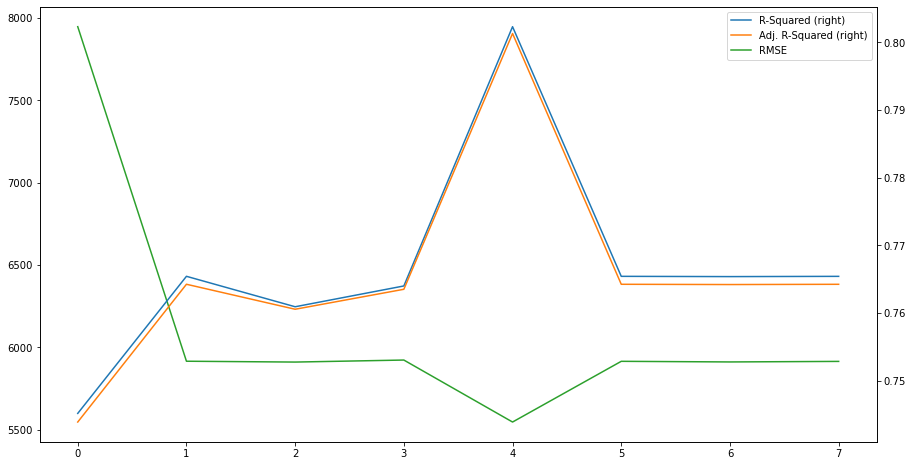

In [446]:
# plot the accuracy measure for all models
# secondary_y: specify the data on the secondary axis
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'])


plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The graph shows the performance metrics root mean squared error, R-squared and Adjusted R-squared of the models implemented: the X-axis has the model number as given in the table. The plot gives a clear picture of the inverse relation of R squared values and the RMSE value, the better the R-squared value naturally the lesser is the RMSE value.
                    <br><br> Findings suggest that the linear regression with interaction algorithm has the highest accuracy with lowest RMSE. Finally, it can be concluded that the linear regression with interaction can be used by insurance company to predict claim amount for its customers.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Test_Set.csv")
df.head()

,OrderId,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,...,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder
0,2372881,2989,others,HR,735,NaN,West,2833.08,Cat-3,UPI,...,29,25.0,1720.0,0,Standard,6,NORTH,5.0,2.0,1
1,2445349,5359,Consumer,MA,737,222.0,Central,14133.42,Cat-49,Debit,...,48,29.0,964.0,1,Standard,4,CENTRAL,3.0,3.0,0
2,2441537,4111,Corporate,GJ,91350,149.0,East,3545.31,Cat-50,Credit,...,46,121.0,2994.0,0,Standard,6,WEST,3.0,1.0,1
3,2461867,5377,Consumer,RJ,77860,162.0,North,9234.05,Cat-12,UPI,...,18,156.0,1008.0,0,Standard,5,CENTRAL,3.0,3.0,1
4,2461659,10563,Consumer,WB,47922,115.0,North,9174.76,Cat-12,UPI,...,18,114.0,1354.0,0,Standard,2,NE,3.0,2.0,1


In [4]:
df.shape

(54156, 27)